*Pierre Guetschel (M2A)*

# BDLE : Requete Cube et pivot

In [1]:
import os

# choisir un mode d'execution: colaboratory, local ou ppti

EXECUTION='colaboratory'


# Pour le mode local
# IL FAUT LANCER JUPYTER NOTEBOOK EN LOCAL ET CHOISIR ENVIRONNEMENT LOCAL EN HAUT A DROITE
# 
# Assurez-vous que l'extension jupyter_http_over_ws Jupyter est activée et à jour sur votre machine.
# pip install --upgrade jupyter_http_over_ws>=0.0.1a3 && jupyter serv e port 8888 et qu'il accepte les requêtes du site https://colab.research.google.com.
# jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888   --NotebookApp.port_retries=0
# voir aussi https://research.google.com/colaboratory/local-runtimes.html
# 
#EXECUTION='local'

# EXECUTION EN SALLE PPTI
#EXECUTION='ppti'

print('EXECUTION', EXECUTION)

SPARK_VERSION="2.4.4"

if EXECUTION == 'colaboratory':
  HOME="/content"
  DATASET_DIR="/content"
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !ls -ld {os.environ["JAVA_HOME"]}
  #os.environ["SPARK_HOME"] = f"{HOME}/spark-{SPARK_VERSION}-bin-hadoop2.7"
  os.environ["SPARK_HOME"] = "{}/spark-{}-bin-hadoop2.7".format(HOME, SPARK_VERSION)

elif EXECUTION == 'local':
  HOME=os.environ["HOME"]
  DATASET_DIR="{}/dataset".format(HOME)
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  # si pyspark deja installé par "conda"
  # os.environ["SPARK_HOME"] = "{}/anaconda3/bin/spark-{}-bin-hadoop2.7".format(HOME, SPARK_VERSION)
  # si on installe spark directement
  os.environ["SPARK_HOME"] = "{}/spark-{}-bin-hadoop2.7".format(HOME, SPARK_VERSION)

elif EXECUTION == 'ppti':
  HOME=os.environ["HOME"]
  DATASET_DIR="/Infos/bd/spark/dataset"
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  os.environ["SPARK_HOME"] = "/usr/local/spark-{}-bin-hadoop2.7".format(SPARK_VERSION)
else:
    print("Valeur incorrecte pour la variable EXECUTION:", EXECUTION)


print('JAVA_HOME:', os.environ["JAVA_HOME"] )
print('SPARK_HOME:', os.environ["SPARK_HOME"])
print('DATASET_DIR:', DATASET_DIR)
print('HOME:', HOME)

EXECUTION colaboratory
drwxr-xr-x 7 root root 4096 Oct 21 15:24 /usr/lib/jvm/java-8-openjdk-amd64
JAVA_HOME: /usr/lib/jvm/java-8-openjdk-amd64
SPARK_HOME: /content/spark-2.4.4-bin-hadoop2.7
DATASET_DIR: /content
HOME: /content


## Téléchargements

télécharger Spark

In [2]:
if EXECUTION == 'ppti':
  print("on ne telecharge pas spark")  
else:
  CLOSER_LOCATION = "https://www.apache.org/dyn/closer.lua/spark/spark-{}/spark-{}-bin-hadoop2.7.tgz".format(SPARK_VERSION, SPARK_VERSION)
  # !wget http://mirror.ibcp.fr/pub/apache/spark/spark-{SPARK_VERSION}/spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
  !wget {CLOSER_LOCATION} -O suggest.html
  !wget `grep "suggest the following mirror" -A2 suggest.html |grep -Po 'href="\K[^"]*'` -O {HOME}/spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
  ! cd {HOME} && tar xzf spark-{SPARK_VERSION}-bin-hadoop2.7.tgz && rm spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
  !rm suggest.html
  !echo "spark installé dans {HOME}/spark-{SPARK_VERSION}-bin-hadoop2.7"
  !ls -ld {os.environ["SPARK_HOME"]}

# Rmq: une autre méthode possible pour télécharger spark: est :  !pip install pyspark

--2019-10-25 15:37:51--  https://www.apache.org/dyn/closer.lua/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
Resolving www.apache.org (www.apache.org)... 40.79.78.1, 95.216.24.32, 2a01:4f9:2a:185f::2
Connecting to www.apache.org (www.apache.org)|40.79.78.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘suggest.html’

suggest.html            [ <=>                ]  34.49K  --.-KB/s    in 0.07s   

2019-10-25 15:37:52 (468 KB/s) - ‘suggest.html’ saved [35321]

--2019-10-25 15:37:53--  http://us.mirrors.quenda.co/apache/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
Resolving us.mirrors.quenda.co (us.mirrors.quenda.co)... 108.61.245.101, 2001:19f0:a:5::28a6
Connecting to us.mirrors.quenda.co (us.mirrors.quenda.co)|108.61.245.101|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230091034 (219M) [application/x-gzip]
Saving to: ‘/content/spark-2.4.4-bin-hadoop2.7.tgz’

/content/spark-2.4. 100%[=========

télécharger findspark

In [3]:
if EXECUTION == 'ppti' :
  !ls -l /Infos/bd/spark/python/findspark.py
else :
  !pip install findspark

télécharger demarrer_spark_colab

In [4]:
# URL du dossier PUBLIC_DATASET contenant des fichiers
PUBLIC_DATASET="https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path="

if EXECUTION == 'ppti' :
  !ls -l /Infos/bd/spark/python/demarrer_spark.py
else :
  !wget {PUBLIC_DATASET}/python/demarrer_spark.py -O demarrer_spark.py

--2019-10-25 15:38:16--  https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path=/python/demarrer_spark.py
Resolving nuage.lip6.fr (nuage.lip6.fr)... 132.227.201.11
Connecting to nuage.lip6.fr (nuage.lip6.fr)|132.227.201.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1624 (1.6K) [text/x-python]
Saving to: ‘demarrer_spark.py’

demarrer_spark.py   100%[===================>]   1.59K  --.-KB/s    in 0.002s  

2019-10-25 15:38:17 (812 KB/s) - ‘demarrer_spark.py’ saved [1624/1624]



télécharger les datasets

In [5]:
if EXECUTION == 'ppti' :
  !ls -ld {DATASET_DIR}/imdb/vldb2015
  
else :
  !mkdir -p {DATASET_DIR}/imdb/vldb2015

  # les donnees entières (1.18GO)
  #!wget {PUBLIC_DATASET}/imdb/vldb2015/csvfiles.tgz -O imdb/vldb2015/csvfiles.tgz
  #!cd imdb/vldb2015 && tar zxf csvfiles.tgz && rm csvfiles.tgz
  #dir = 'imdb//vldb2015/csvfiles/'

  ## Effacer dataset complet
  #!cd 
  #!ls imdb
  #!rm -rf imdb/csvfiles

  # un sample basé sur 1% des films
  !wget {PUBLIC_DATASET}/imdb/vldb2015/csvfiles_sample001.tgz -O {DATASET_DIR}/imdb/vldb2015/csvfiles_sample001.tgz
  !cd {DATASET_DIR}/imdb/vldb2015 && tar zxf csvfiles_sample001.tgz && rm csvfiles_sample001.tgz
  print("dataset téléchargé")

--2019-10-25 15:38:20--  https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path=/imdb/vldb2015/csvfiles_sample001.tgz
Resolving nuage.lip6.fr (nuage.lip6.fr)... 132.227.201.11
Connecting to nuage.lip6.fr (nuage.lip6.fr)|132.227.201.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73571656 (70M) [application/x-compressed]
Saving to: ‘/content/imdb/vldb2015/csvfiles_sample001.tgz’

/content/imdb/vldb2 100%[===================>]  70.16M  20.5MB/s    in 4.3s    

2019-10-25 15:38:26 (16.2 MB/s) - ‘/content/imdb/vldb2015/csvfiles_sample001.tgz’ saved [73571656/73571656]

dataset téléchargé


télécharger la définition des tables imdb

In [6]:
if EXECUTION == 'ppti':
  !cp {DATASET_DIR}/imdb/vldb2015/tables_imdb.py tables_imdb.py
else:
  !wget {PUBLIC_DATASET}/imdb/vldb2015/tables_imdb.py -O tables_imdb.py

--2019-10-25 15:38:30--  https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path=/imdb/vldb2015/tables_imdb.py
Resolving nuage.lip6.fr (nuage.lip6.fr)... 132.227.201.11
Connecting to nuage.lip6.fr (nuage.lip6.fr)|132.227.201.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4706 (4.6K) [text/x-python]
Saving to: ‘tables_imdb.py’

tables_imdb.py      100%[===================>]   4.60K  --.-KB/s    in 0.003s  

2019-10-25 15:38:31 (1.43 MB/s) - ‘tables_imdb.py’ saved [4706/4706]



## Démarrer la session spark

In [7]:
from demarrer_spark import demarrer_spark

spark = demarrer_spark()

les dossiers contenant les packages

/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
findspark.init() initialise les variables d'environnement pour spark
import fait
session démarrée, son id est  local-1572017917639


### Définir l'accès aux fichiers de données

In [8]:
from tables_imdb import lire_tables
dir = "{}/imdb/vldb2015/csvfiles_sample001/".format(DATASET_DIR)

title, kind_type, movie_info, info_type, cast_info, role_type, name,  \
person_info, movie_companies, company_name,company_type \
= lire_tables(spark, dir)

print("tables définies")

tables définies


In [9]:
title.count()

25084

## Les lieux de tournage avec l'attribut locations
### dimension géo avec 3 niveaux ville, province, pays 

In [10]:
location = spark.sql("""
select  t.id, m.info
from Title t, Movie_info m, Info_type i
where t.id = m.movie_id and m.info_type_id = i.id
and i.info = 'locations'
""")
location.show(5,False)

locationTab = spark.sql("""
select  t.id, split(m.info, ',') as locations
from Title t, Movie_info m, Info_type i
where t.id = m.movie_id and m.info_type_id = i.id
and i.info = 'locations'
""")
locationTab.show(5,False)
locationTab.createOrReplaceTempView('locationTab')

locationsTownCountry = spark.sql("""
select  id, trim(element_at(locations, size(locations))) as country, 
            trim(element_at(locations, size(locations)-1)) as province,
            trim(element_at(locations, size(locations)-2)) as town
from locationTab
where size(locations) >=3
""")
locationsTownCountry.createOrReplaceTempView('locationsTownCountry')

print(locationsTownCountry.count())
locationsTownCountry.show(10,False)

+----+----------------------------------------------------------------------------+
|id  |info                                                                        |
+----+----------------------------------------------------------------------------+
|3981|Action Concept Studios, Hürth-Kalscheuren, North Rhine - Westphalia, Germany|
|3981|Hürth, North Rhine - Westphalia, Germany                                    |
|3981|North Rhine - Westphalia, Germany                                           |
|8413|Vancouver, British Columbia, Canada                                         |
|9597|Lyric Theatre, Shaftesbury Avenue, London, England, UK                      |
+----+----------------------------------------------------------------------------+
only showing top 5 rows

+----+---------------------------------------------------------------------------------+
|id  |locations                                                                        |
+----+-----------------------------------

# Travail personel


In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (20,10)

import numpy as np


## Genre et attribution de rôles

On s'intéresse d'abord au genre des personnes à qui sont attribués les rôles principaux dans les films. 

In [12]:
genres = spark.sql("""

select gender, count(*)
from Name 
group by gender
""")

genres.show()

+------+--------+
|gender|count(1)|
+------+--------+
|     f|   51410|
|     m|   98022|
|  null|   65317|
+------+--------+



In [13]:
dates = spark.sql("""

select production_year, count(*)
from Title 
group by production_year
order by -production_year
""")

dates.show()

+---------------+--------+
|production_year|count(1)|
+---------------+--------+
|           null|     716|
|           2016|       1|
|           2015|       4|
|           2014|      26|
|           2013|     658|
|           2012|    1605|
|           2011|    1517|
|           2010|    1467|
|           2009|    1301|
|           2008|    1192|
|           2007|    1186|
|           2006|    1033|
|           2005|     948|
|           2004|     854|
|           2003|     676|
|           2002|     581|
|           2001|     573|
|           2000|     543|
|           1999|     506|
|           1998|     452|
+---------------+--------+
only showing top 20 rows



In [14]:
req = spark.sql("""

SELECT c.nr_order
FROM  Cast_info c
GROUP BY c.nr_order
ORDER BY nr_order

""")

req.show()
print(req.count())

+--------+
|nr_order|
+--------+
|    null|
|       0|
|       1|
|       2|
|       3|
|       4|
|       5|
|       6|
|       7|
|       8|
|       9|
|      10|
|      11|
|      12|
|      13|
|      14|
|      15|
|      16|
|      17|
|      18|
+--------+
only showing top 20 rows

288


In [0]:
req = spark.sql("""

SELECT c.person_role_id, n.gender, count(*)


FROM Name n, Cast_info c

where c.person_id = n.id
GROUP BY CUBE(n.gender, c.person_role_id)
ORDER BY  person_role_id, gender

""")

#req.show()
## apparement person_role_id n'est pas l'ordre de casting. Plutot nr_order (cf cellule suivante)

In [16]:
req = spark.sql("""

SELECT c.nr_order, n.gender, count(*)
FROM Name n, Cast_info c
WHERE c.person_id = n.id AND (n.gender IS NOT NULL) AND (c.nr_order IS NOT NULL)

GROUP BY CUBE(n.gender, c.nr_order)
ORDER BY  nr_order, gender

""")

req.show()

+--------+------+--------+
|nr_order|gender|count(1)|
+--------+------+--------+
|    null|  null|  105910|
|    null|     f|   38664|
|    null|     m|   67246|
|       0|  null|    1295|
|       0|     f|     168|
|       0|     m|    1127|
|       1|  null|   12159|
|       1|     f|    3782|
|       1|     m|    8377|
|       2|  null|    9069|
|       2|     f|    3681|
|       2|     m|    5388|
|       3|  null|    7744|
|       3|     f|    3041|
|       3|     m|    4703|
|       4|  null|    6969|
|       4|     f|    2684|
|       4|     m|    4285|
|       5|  null|    6419|
|       5|     f|    2441|
+--------+------+--------+
only showing top 20 rows



On va maintenant regarder le nombre de femme et le nombre d'homme dans les n premiers rôles des films

On utilise donc des frames :

In [17]:
nmax = 10

r0 = spark.sql("""

SELECT c.nr_order, n.gender, count(*) as nb
FROM Name n, Cast_info c
WHERE c.person_id = n.id 

GROUP BY CUBE(n.gender, c.nr_order)
HAVING (gender IS NOT NULL) AND (nr_order IS NOT NULL)
ORDER BY  nr_order, gender

""")
r0.createOrReplaceTempView('table0')

r1 = spark.sql("""

SELECT
    gender,
    nr_order,
    nb,
    sum(nb) OVER (PARTITION BY gender ORDER BY nr_order RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as nb_sum
FROM table0
ORDER BY nr_order
""")

r1.show()
print(r1.count())

## On affiche graphiquement les résultats :

t = r1.collect()
val_dict = {}
for x in t:
    k = x.gender
    if k not in val_dict.keys():
        val_dict[k] = []
        print('new key : "{}"'.format(k))
    v = (x.nr_order, x.nb, x.nb_sum)
    val_dict[k].append(v)

for k,v in val_dict.items():
    l = list(zip(*v))
    nr_order, nb, nb_sum = l
     
    order = np.argsort(nr_order)
    nr_order = [nr_order[i] for i in order][:nmax]
    nb       = [      nb[i] for i in order][:nmax]
    nb_sum   = [  nb_sum[i] for i in order][:nmax]
    plt.plot(nr_order, nb,     label="{} - nb".format(k))
    plt.plot(nr_order, nb_sum, label="{} - nb_sum".format(k))

plt.legend()

+------+--------+----+------+
|gender|nr_order|  nb|nb_sum|
+------+--------+----+------+
|     m|       0|1127|  1127|
|     f|       0| 168|   168|
|     m|       1|8377|  9504|
|     f|       1|3782|  3950|
|     f|       2|3681|  7631|
|     m|       2|5388| 14892|
|     m|       3|4703| 19595|
|     f|       3|3041| 10672|
|     m|       4|4285| 23880|
|     f|       4|2684| 13356|
|     m|       5|3978| 27858|
|     f|       5|2441| 15797|
|     m|       6|3621| 31479|
|     f|       6|2132| 17929|
|     f|       7|1952| 19881|
|     m|       7|3182| 34661|
|     f|       8|1722| 21603|
|     m|       8|2900| 37561|
|     m|       9|2652| 40213|
|     f|       9|1485| 23088|
+------+--------+----+------+
only showing top 20 rows

429
new key : "f"
new key : "m"


On s'intéresse maintenant à l'évolution dans le tremps du genre des personnes à qui sont attribués les rôles principaux dans les films.

On va grouper les attributions de rôles par année de sortie des films

Pour afficher cette évolution, on va utiliser une surface 3D.

+---------------+------+--------+---+------+
|production_year|gender|nr_order| nb|nb_sum|
+---------------+------+--------+---+------+
|           1910|     m|       0|  1|     1|
|           1913|     f|       0|  2|     2|
|           1918|     m|       0|  1|     1|
|           1920|     m|       0|  2|     2|
|           1925|     m|       0|  1|     1|
|           1926|     m|       0|  5|     5|
|           1928|     m|       0|  1|     1|
|           1929|     m|       0|  3|     3|
|           1929|     f|       0|  1|     1|
|           1930|     f|       0|  1|     1|
|           1930|     m|       0|  1|     1|
|           1931|     m|       0|  2|     2|
|           1932|     m|       0|  2|     2|
|           1933|     m|       0|  1|     1|
|           1934|     m|       0|  1|     1|
|           1935|     m|       0|  1|     1|
|           1936|     m|       0|  3|     3|
|           1938|     m|       0|  1|     1|
|           1939|     m|       0|  3|     3|
|         

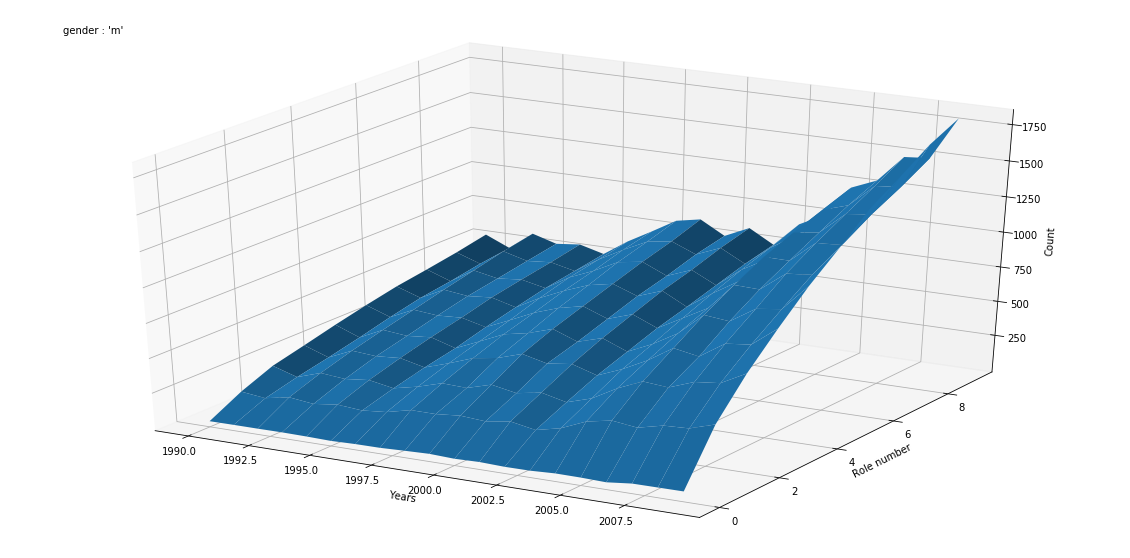

In [18]:
nmax = 10
yearmin = 1990
yearmax = 2010

r0 = spark.sql("""

SELECT production_year, c.nr_order, n.gender, count(*) as nb
FROM Name n, Cast_info c, Title t
WHERE c.person_id = n.id AND c.movie_id = t.id

GROUP BY CUBE(n.gender, c.nr_order, production_year)
HAVING (gender IS NOT NULL) AND (nr_order IS NOT NULL) AND (production_year is NOT NULL)
ORDER BY  production_year, nr_order, gender

""")
r0.createOrReplaceTempView('table0')

r1 = spark.sql("""

SELECT
    production_year,
    gender,
    nr_order,
    nb,
    sum(nb) OVER (PARTITION BY gender, production_year ORDER BY nr_order RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as nb_sum
FROM table0
ORDER BY nr_order, production_year
""")

r1.show()
print(r1.count())

## On affiche graphiquement les résultats :

t = r1.collect()
val_dict = {}
for x in t:
    k = x.gender
    if k not in val_dict.keys():
        val_dict[k] = []
        print('new key : "{}"'.format(k))
    v = (x.nr_order, x.nb, x.nb_sum, x.production_year)
    val_dict[k].append(v)

for k,v in val_dict.items():
    l = list(zip(*v))
    nr_order, nb, nb_sum, year = l
     
    order = np.argsort(nr_order)
    nr_order = np.array([nr_order[i] for i in order])
    nb       = np.array([      nb[i] for i in order])
    nb_sum   = np.array([  nb_sum[i] for i in order])
    year     = np.array([    year[i] for i in order])
    
    X = np.arange(yearmin, yearmax)
    Y = np.arange(np.min(nr_order), nmax)
    Z = np.zeros((X.shape[0], Y.shape[0]))
    
    def idx(l, x):
        for i, xx in enumerate(l):
            if xx==x: return i
        raise ArgumentError
    for x,y,z in zip(year, nr_order, nb_sum):
        if x in X and y in Y:
            i = idx(X,x)
            j = idx(Y,y)
            Z[i,j] = z
    
    X,Y = np.meshgrid(X,Y)
    
    ## 3D plot :
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,Y,Z.T) #, rstride=1,cstride=1,linewidth=0, antialiased=False)
    ax.text2D(0.05, 0.95, "gender : '{}'".format(k), transform=ax.transAxes)
    ax.set_xlabel('Years')
    ax.set_ylabel('Role number')
    ax.set_zlabel('Count')
    plt.show()
    

## Nation domination graph (AOE style)

graph representing  evolution of the participation of nations in movies 

In [0]:

def plot_proportion_evolution(x, values, labels, normalize=True, sort=True, mountains=False, title=""):
    '''
    displays an evolution of repartition using pyplot.bar()
    
    x : time axis
    values : list of value arrays
    normalize  : if normalize=False, the values are expected to sum at 1 
    '''
    n = len(values)
    if normalize:
        values = [np.copy(v) for v in values]
        vsum = np.zeros(x.shape)
        for v in values:
            vsum += v
        for i in range(n):
            values[i] = values[i]/vsum
        for i,v_i in enumerate(vsum):
            if v_i == 0:
                for j in range(n):
                    values[j][i] = 0 # remove NaN values
    
    if sort:
        averages = [np.sum(v) for v in values]
        order = np.argsort(averages)
        values = [values[i] for i in order]
        labels = [labels[i] for i in order]
    
    rest = np.zeros(x.shape)
    axes = []
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(8,8))
    for i,v in enumerate(values):
        if mountains:            
            v_ax = ax.bar(x, v, 1., bottom=float(n-i)/n, linewidth=0.)
        else:
            v_ax = ax.bar(x, v, 1., bottom=rest, linewidth=0.)
        axes.append(v_ax)
        rest += v
    ax.set_ylabel('proportions')
    ax.set_xlabel('temps')
    ax.set_title(title)
    ax.legend(axes[::-1], labels[::-1]) # lists are reversed
    


In [0]:
def plot_proportion_evolution2(x, values, labels, normalize=True, sort=True, title=""):
    '''
    displays an evolution of repartition using pyplot.fill()

    x : time axis
    values : list of value arrays
    normalize  : if normalize=False, the values are expected to sum at 1 
    '''
    n = len(values)
    if normalize:
        values = [np.copy(v) for v in values]
        vsum = np.zeros(x.shape)
        for v in values:
            vsum += v
        for i in range(n):
            values[i] = values[i]/vsum
        for i,v_i in enumerate(vsum):
            if v_i == 0:
                for j in range(n):
                    values[j][i] = 0 # remove NaN values
    
    if sort:
        averages = [np.sum(v) for v in values]
        order = np.argsort(averages)
        values = [values[i] for i in order]
        labels = [labels[i] for i in order]
    
    rest = np.zeros(x.shape)
    axes = []
    xx = np.concatenate((x, np.flip(x)))
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(8,8))
    for v,l in zip(values, labels):
        next_rest = rest + v
        y = np.concatenate((rest, np.flip(next_rest)))
        rest = next_rest
        v_ax = ax.fill(xx, y, label=l)
        axes.append(v_ax)
    ax.set_ylabel('proportions')
    ax.set_xlabel('temps')
    ax.set_title(title)
    # ax.legend(axes[::-1], labels[::-1]) # lists are reversed
    #plt.legend()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels))

In [21]:
## Testing plot_proportion_evolution() with random values :
N = 50
n = 5
gamma = .5
m=False
    
x = np.arange(N)

values = []
labels = []
for v_i in range(n):
    p = np.random.rand(N) +(n/2-v_i)**2 
    for i in range(1,N):
        p[i] = (1-gamma)*p[i] + gamma*p[i-1]
    values.append(p)
    labels.append('v{}'.format(v_i))

plot_proportion_evolution2(x, values, labels, normalize=True, title='testing the plot function')


In [22]:
parPays = spark.sql("""
select  country, count(*) as nb
from locationsTownCountry
group by country
order by nb desc
""")
print(parPays.count())
parPays.show(5)


59
+-------+----+
|country|  nb|
+-------+----+
|    USA|3174|
|     UK| 487|
| Canada| 307|
|Germany| 241|
|  Spain| 172|
+-------+----+
only showing top 5 rows



In [23]:
r = spark.sql("""

select  country, production_year, count(*) as nb
from locationsTownCountry loc, Title t
WHERE t.id==loc.id 
group by country, production_year
HAVING country IS NOT NULL AND production_year IS NOT NULL AND nb IS NOT NULL
order by country, production_year
""")
print(r.count())
r.show()

t = r.collect()

all_years = [x.production_year for x in t]
min_year = np.min(all_years)
max_year = np.max(all_years)
years = np.arange(min_year, max_year+1)

countries = []
c = None
values = []
for x in t:
    if c is None or x.country != c:
        c = x.country
        countries.append(c)
        values.append(np.zeros(years.shape))
    values[-1][x.production_year-min_year] = x.nb

    
plot_proportion_evolution2(years, values, countries, normalize=True, title="Without filtering")

k = 3
sums = []
for v in values:
    sums.append(np.sum(v))
order = np.flip(np.argsort(sums))
values    = [values[i]    for i in order]
countries = [countries[i] for i in order]
values, other_val = values[:k], values[k:]
countries = countries[:k]
other_sum = np.zeros(years.shape)
for v in other_val:
    other_sum += v
values.append(other_sum)
countries.append("other")
plot_proportion_evolution2(years, values, countries, normalize=True, title="With filtering ({} best + others)".format(k))


722
+---------+---------------+---+
|  country|production_year| nb|
+---------+---------------+---+
|Argentina|           1938|  1|
|Argentina|           1944|  1|
|Argentina|           1951|  1|
|Argentina|           1966|  1|
|Argentina|           1968|  1|
|Argentina|           1972|  1|
|Argentina|           1976|  1|
|Argentina|           1977|  1|
|Argentina|           1980|  7|
|Argentina|           1982|  1|
|Argentina|           1984|  2|
|Argentina|           1987|  3|
|Argentina|           1992|  1|
|Argentina|           1994|  4|
|Argentina|           1995|  3|
|Argentina|           1996|  7|
|Argentina|           1997| 10|
|Argentina|           1998|  4|
|Argentina|           1999|  4|
|Argentina|           2000|  6|
+---------+---------------+---+
only showing top 20 rows



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Maintenant on veut directement récupérer les proportions de participation de chaque pays par année.
Cela nous évitera d'avoir à normaliser les données avec python.
Pour ce faire on va utiliser une `FRAME`.

Donc **à partir de maintenant `normalize=False`** dans les paramètres de `plot_proportion_evolution2()`, on normalise les données avec SQL.

In [24]:
r = spark.sql("""
SELECT *, nb / (sum(nb) OVER (PARTITION BY production_year)) as p
FROM (

select  country, production_year, count(*) as nb
from locationsTownCountry loc, Title t
WHERE t.id==loc.id 
group by country, production_year
HAVING country IS NOT NULL AND production_year IS NOT NULL AND nb IS NOT NULL

)
order by country, production_year
""")
print(r.count())
r.show()

t = r.collect()

all_years = [x.production_year for x in t]
min_year = np.min(all_years)
max_year = np.max(all_years)
years = np.arange(min_year, max_year+1)

countries = []
c = None
values = []
for x in t:
    if c is None or x.country != c:
        c = x.country
        countries.append(c)
        values.append(np.zeros(years.shape))
    values[-1][x.production_year-min_year] = x.p



k = 3
sums = []
for v in values:
    sums.append(np.sum(v))
order = np.flip(np.argsort(sums))
values    = [values[i]    for i in order]
countries = [countries[i] for i in order]
values, other_val = values[:k], values[k:]
countries = countries[:k]
other_sum = np.zeros(years.shape)
for v in other_val:
    other_sum += v
values.append(other_sum)
countries.append("other")

plot_proportion_evolution2(years, values, countries, normalize=False, title="With filtering ({} best + others)".format(k))


722
+---------+---------------+---+--------------------+
|  country|production_year| nb|                   p|
+---------+---------------+---+--------------------+
|Argentina|           1938|  1|0.043478260869565216|
|Argentina|           1944|  1| 0.16666666666666666|
|Argentina|           1951|  1|               0.125|
|Argentina|           1966|  1|0.034482758620689655|
|Argentina|           1968|  1|0.010101010101010102|
|Argentina|           1972|  1|               0.025|
|Argentina|           1976|  1|0.017241379310344827|
|Argentina|           1977|  1|0.027777777777777776|
|Argentina|           1980|  7|  0.1590909090909091|
|Argentina|           1982|  1| 0.02564102564102564|
|Argentina|           1984|  2| 0.07142857142857142|
|Argentina|           1987|  3| 0.05263157894736842|
|Argentina|           1992|  1| 0.01282051282051282|
|Argentina|           1994|  4| 0.06451612903225806|
|Argentina|           1995|  3| 0.04918032786885246|
|Argentina|           1996|  7| 0.12962962

On constate que les courbes sont très bruités à cause du faible nombre de données. On souhaite donc regrouper les années (cad. n'avoir un point que tous les 5 ou 10 ans).

On utilise une division euclidienne pour ce faire avec un étage de requête en plus :

220
+---------+-----------+---+--------------------+
|  country|year_merged| nb|                   p|
+---------+-----------+---+--------------------+
|Argentina|       1940|  1|0.009433962264150943|
|Argentina|       1960|  2| 0.00408997955010225|
|Argentina|       1950|  1|0.004273504273504274|
|Argentina|       2010|  6| 0.00683371298405467|
|Argentina|       1980| 13|0.029953917050691243|
|Argentina|       1990| 33| 0.04680851063829787|
|Argentina|       2000| 42|           0.0234375|
|Argentina|       1970|  3|0.006880733944954129|
|Argentina|       1930|  1|0.011111111111111112|
|Australia|       2000| 28|            0.015625|
|Australia|       1980| 19| 0.04377880184331797|
|Australia|       2010| 14|0.015945330296127564|
|Australia|       1990| 13|0.018439716312056736|
|Australia|       1970|  4|0.009174311926605505|
|Australia|       1950|  1|0.004273504273504274|
|  Austria|       1940|  1|0.009433962264150943|
|  Austria|       2000|  8|0.004464285714285714|
|  Austria|     

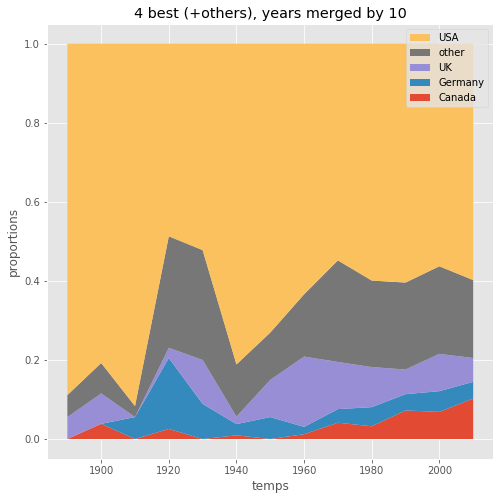

In [25]:
FREQ = 10  # number of years to merge toogether
k    = 4  # number of countries to keep on the graph (plus others)

r0 = spark.sql("""
    SELECT country,
        (production_year - production_year % {}) as year_merged
    FROM locationsTownCountry loc, Title t
    WHERE t.id==loc.id 

""".format(FREQ))
r0.createOrReplaceTempView("table0")
r1 = spark.sql("""

    select country, year_merged, count(*) as nb
    FROM table0
    GROUP BY country, year_merged

""")
r1.createOrReplaceTempView("table1")

r = spark.sql("""

SELECT *, (nb / sum(nb) OVER (PARTITION BY year_merged)) as p
FROM table1
WHERE country IS NOT NULL AND year_merged IS NOT NULL 
order by country

""")

print(r.count())
r.show()

t = r.collect()

all_years = [x.year_merged for x in t]
min_year = np.min(all_years)
max_year = np.max(all_years)
years = np.arange(min_year, max_year+1, FREQ)
print(years)

countries = []
c = None
values = []
for x in t:
    if c is None or x.country != c:
        c = x.country
        countries.append(c)
        values.append(np.zeros(years.shape))
    idx = (x.year_merged - min_year) // FREQ
    values[-1][idx] = x.p



sums = []
for v in values:
    sums.append(np.sum(v))
order = np.flip(np.argsort(sums))
values    = [values[i]    for i in order]
countries = [countries[i] for i in order]
values, other_val = values[:k], values[k:]
countries = countries[:k]
other_sum = np.zeros(years.shape)
for v in other_val:
    other_sum += v
values.append(other_sum)
countries.append("other")

plot_proportion_evolution2(years, values, countries, normalize=False, title="{} best (+others), years merged by {}".format(k, FREQ))


Maintenant, au lieu de merger des années entre elles, on va lisser la courbe en utilisant une fenêtre glissante avec les `FRAME`.

FRAME Created for : "ROWS BETWEEN 4 PRECEDING AND 5 FOLLOWING"
722
+---------+---------------+---+--------+--------------------+
|  country|production_year| nb|nb_frame|                   p|
+---------+---------------+---+--------+--------------------+
|Argentina|           1938|  1|       6| 0.03636363636363636|
|Argentina|           1944|  1|       7| 0.06306306306306306|
|Argentina|           1951|  1|       8| 0.06611570247933884|
|Argentina|           1966|  1|      15|  0.0391644908616188|
|Argentina|           1968|  1|      16|0.025356576862123614|
|Argentina|           1972|  1|      17| 0.03728070175438596|
|Argentina|           1976|  1|      19|0.035916824196597356|
|Argentina|           1977|  1|      19|0.045346062052505964|
|Argentina|           1980|  7|      22| 0.05612244897959184|
|Argentina|           1982|  1|      24| 0.05825242718446602|
|Argentina|           1984|  2|      30| 0.06976744186046512|
|Argentina|           1987|  3|      39| 0.06446280991735537|
|Ar

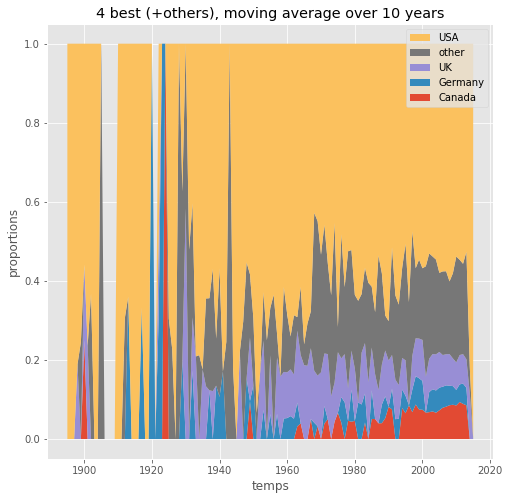

In [26]:
FREQ = 10  # number of years to merge toogether
k    = 4  # number of countries to keep on the graph (plus others)

prec, foll = (FREQ-1)//2, FREQ//2
print('FRAME Created for : "ROWS BETWEEN {} PRECEDING AND {} FOLLOWING"'.format(prec, foll))

r0 = spark.sql("""
    
    SELECT country, production_year, count(*) as nb
    FROM locationsTownCountry loc, Title t
    WHERE t.id==loc.id 
    GROUP BY country, production_year


""")
r0.createOrReplaceTempView("table0")

r1 = spark.sql("""

SELECT *, SUM(nb) OVER ( ORDER BY country, production_year ROWS BETWEEN {} PRECEDING AND {} FOLLOWING ) as nb_frame
FROM table0

""".format(prec, foll))
r1.createOrReplaceTempView('table1')

r = spark.sql("""

SELECT *, (nb_frame / SUM(nb_frame) OVER (PARTITION BY production_year) ) as p
FROM table1
WHERE country IS NOT NULL AND production_year IS NOT NULL 
order by country, production_year

""")

print(r.count())
r.show()

t = r.collect()

all_years = [x.production_year for x in t]
min_year = np.min(all_years)
max_year = np.max(all_years)
years = np.arange(min_year, max_year+1)

countries = []
c = None
values = []
for x in t:
    if c is None or x.country != c:
        c = x.country
        countries.append(c)
        values.append(np.zeros(years.shape))
    idx = (x.production_year - min_year)
    values[-1][idx] = x.p



sums = []
for v in values:
    sums.append(np.sum(v))
order = np.flip(np.argsort(sums))
values    = [values[i]    for i in order]
countries = [countries[i] for i in order]
values, other_val = values[:k], values[k:]
countries = countries[:k]
other_sum = np.zeros(years.shape)
for v in other_val:
    other_sum += v
values.append(other_sum)
countries.append("other")

plot_proportion_evolution2(years, values, countries, normalize=False, title="{} best (+others), moving average over {} years".format(k, FREQ))


Maintenant on va s'intéresser aux couples `country-genre` des films (plus seulement aux `country`).

Pour cela on va utilisre la fonction `PIVOT` et on reprends 
l'exemple avec les années agrégées pour plus de lisibilité:

In [27]:
r = spark.sql("""
    select id, info
    from Info_type 
""")
r.show()

r = spark.sql("""
select m.info
from Movie_info m, Info_type t
where t.id=m.info_type_id AND t.info="{}"
group by m.info
""".format('genres'))
r.show()

+---+------------------+
| id|              info|
+---+------------------+
|  1|          runtimes|
|  2|        color info|
|  3|            genres|
|  4|         languages|
|  5|      certificates|
|  6|         sound mix|
|  7|         tech info|
|  8|         countries|
|  9|          taglines|
| 10|          keywords|
| 11|alternate versions|
| 12|     crazy credits|
| 13|             goofs|
| 14|        soundtrack|
| 15|            quotes|
| 16|     release dates|
| 17|            trivia|
| 18|         locations|
| 19|    mini biography|
| 20|       birth notes|
+---+------------------+
only showing top 20 rows

+----------+
|      info|
+----------+
|     Crime|
| Talk-Show|
| Game-Show|
|   Fantasy|
|    Horror|
|     Short|
|     Music|
|     Drama|
|   History|
|Reality-TV|
| Adventure|
|      News|
|    Sci-Fi|
|   Musical|
|   Western|
| Biography|
|    Family|
|    Comedy|
|  Thriller|
| Animation|
+----------+
only showing top 20 rows



In [28]:
FREQ = 15  # number of years to merge toogether
K    = 8  # number of countries to keep on the graph (plus others)


r00 = spark.sql("""
    SELECT country, production_year, i.info AS info_type, m.info AS info_content  
    FROM locationsTownCountry loc, Title t, Movie_info m, Info_type i
    WHERE t.id==loc.id AND t.id==m.movie_id AND i.id==m.info_type_id
 """)
r00.createOrReplaceTempView("table00")

r0 = spark.sql("""

    SELECT 
        country,
        genre,
        (production_year - production_year % {}) as year_merged
    FROM table00
    PIVOT (  
        last(info_content)
        FOR info_type IN  
        ( "genres" genre, "locations" location )  
    )
    
    
""".format(FREQ))
# r0.show()

r0.createOrReplaceTempView("table0")
r1 = spark.sql("""

    select country, genre, year_merged, count(*) as nb
    FROM table0
    GROUP BY country, genre, year_merged

""")
r1.createOrReplaceTempView("table1")

r = spark.sql("""

SELECT *, (nb / sum(nb) OVER (PARTITION BY year_merged)) as p
FROM table1
WHERE country IS NOT NULL AND year_merged IS NOT NULL AND genre IS NOT NULL
order by country, genre

""")

print(r.count())
r.show()

t = r.collect()

all_years = [x.year_merged for x in t]
min_year = np.min(all_years)
max_year = np.max(all_years)
years = np.arange(min_year, max_year+1, FREQ)
print(years)

keys = []
k = None
values = []
for x in t:
    know = (x.country, x.genre)
    if k is None or know != k:
        k = know
        keys.append(k)
        values.append(np.zeros(years.shape))
    idx = (x.year_merged - min_year) // FREQ
    values[-1][idx] = x.p



keys = ['-'.join(k) for k in keys]
sums = []
for v in values:
    sums.append(np.sum(v))
order = np.flip(np.argsort(sums))
values = [values[i] for i in order]
keys   = [  keys[i] for i in order]
values, other_val = values[:K], values[K:]
keys = keys[:K]
other_sum = np.zeros(years.shape)
for v in other_val:
    other_sum += v
values.append(other_sum)
keys.append("other")

plot_proportion_evolution2(years, values, keys, normalize=False, title="{} best (+others), years merged by {}".format(K, FREQ))


452
+---------+-----------+-----------+---+--------------------+
|  country|      genre|year_merged| nb|                   p|
+---------+-----------+-----------+---+--------------------+
|Argentina|     Comedy|       1965|  1| 0.01020408163265306|
|Argentina|     Comedy|       1995|  1|0.004524886877828055|
|Argentina|Documentary|       1995|  1|0.004524886877828055|
|Argentina|      Drama|       1980|  2| 0.02197802197802198|
|Argentina|      Drama|       1995|  1|0.004524886877828055|
|Argentina|      Drama|       2010|  1|0.014285714285714285|
|Argentina|     Family|       1965|  1| 0.01020408163265306|
|Argentina|    Fantasy|       1995|  1|0.004524886877828055|
|Argentina|      Music|       2010|  1|0.014285714285714285|
|Argentina|    Musical|       1935|  2|0.044444444444444446|
|Argentina|    Musical|       1965|  1| 0.01020408163265306|
|Argentina|    Musical|       1950|  1|0.017543859649122806|
|Argentina|    Romance|       1965|  1| 0.01020408163265306|
|Argentina|    Roman